In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(mouse_data_df, clinical_data_df, on = "Mouse ID", how = "outer")

# Display the data table for preview
combined_df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorvol_by_drug = combined_df.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
tumorvol_by_drug = tumorvol_by_drug.reset_index()
del tumorvol_by_drug["Metastatic Sites"]
tumorvol_by_drug

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drug_sem = combined_df.groupby(['Drug', 'Timepoint']).sem()

del drug_sem['Mouse ID']
del drug_sem['Metastatic Sites']

drug_sem = drug_sem.reset_index()
drug_sem

# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [50]:
# Minor Data Munging to Re-Format the Data Frames
#list of drugs from df
drug_list = tumorvol_by_drug['Drug'].unique()

#range of timepoints
timepoint_list = list(range(0, 50, 5))

tumorvol_by_drug_mod = pd.DataFrame({'Drug Timepoint': timepoint_list})
#iterate for each drug to copy into reformated df

for drug in drug_list:
    tumorvol_by_drug_mod[drug] = list(tumorvol_by_drug.loc[tumorvol_by_drug['Drug']== drug, 'Tumor Volume (mm3)'])

tumorvol_by_drug_mod = tumorvol_by_drug_mod.set_index('Drug Timepoint')
# Preview that Reformatting worked
tumorvol_by_drug_mod

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Drug Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


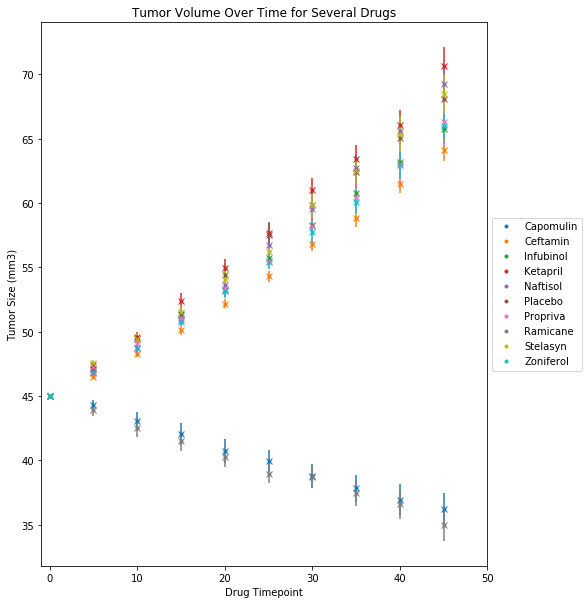

In [71]:
# Generate the Plot (with Error Bars)
# ax = tumorvol_by_drug_mod.plot(kind = "scatter", x = 'Drug Timepoint', y = 'Capomulin', label = 'Capomulin')

# for drug in drug_list[1:]:
ax = tumorvol_by_drug_mod.plot(kind = "line", label = drug, linestyle = "none", marker = '.', 
                          title = 'Tumor Volume Over Time for Several Drugs', xlim = (-1, 50), figsize =(10,10))
plt.ylabel('Tumor Size (mm3)')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.errorbar(x = tumorvol_by_drug_mod.index, y = tumorvol_by_drug_mod['Infubinol'], yerr = drug_sem.loc[drug_sem['Drug'] == 'Infubinol', 'Tumor Volume (mm3)'], fmt = 'o')

for drug in drug_list:
    ycoord = tumorvol_by_drug_mod[drug]
    yerr = drug_sem.loc[drug_sem['Drug'] == drug, 'Tumor Volume (mm3)']
    plt.errorbar(x = tumorvol_by_drug_mod.index, y = ycoord, yerr = yerr, fmt = 'x')


# Save the Figure
plt.savefig('Tumor Size Over Time')


In [29]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)